# **Simple CNN model: Predict Housing Prices**

I created a simple CNN model to predict house prices using this data. 

The tutorial I followed to accomplish this task: https://hackernoon.com/build-your-first-neural-network-to-predict-house-prices-with-keras-3fb0839680f4


### **Exploring and Processing the Data**


*   read in csv file
*   split dataset into x (input feature) and y (label)
*   normalization 
*   split data into training set, validation set, and test set





In [2]:
# Read CSV data

import pandas as pd

# read in the data from CSV file
df = pd.read_csv("sample_data/housepricedata.csv")

# shows the data stored in df
df

# last column: "Above Median Price" needed
# Prediction: Is house price above median? no = 0, yes = 1

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1
...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,5,953,2,1,3,7,1,460,1
1456,13175,6,6,1542,2,0,3,7,2,500,1
1457,9042,7,9,1152,2,0,4,9,2,252,1
1458,9717,5,6,1078,1,0,2,5,0,240,0


In [3]:
#convert data into arrays
dataset = df.values

dataset

array([[ 8450,     7,     5, ...,     0,   548,     1],
       [ 9600,     6,     8, ...,     1,   460,     1],
       [11250,     7,     5, ...,     1,   608,     1],
       ...,
       [ 9042,     7,     9, ...,     2,   252,     1],
       [ 9717,     5,     6, ...,     0,   240,     0],
       [ 9937,     5,     6, ...,     0,   276,     0]])

In [7]:
# Split dataset into x and y

# assign first 10 cols of array to x (input features)
x = dataset[:,0:10]

# assign last 10 cols of array to y (feature wanting to predict)
y = dataset[:,10]

In [8]:
# Normalization
# -confirm scale of input features are similar -> preprocessing

from sklearn import preprocessing

# normalize the dataset so that input features are between 0 and 1
min_max_scaler = preprocessing.MinMaxScaler()
x_scale = min_max_scaler.fit_transform(x)

#display scaled array x
x_scale

array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

In [9]:
# Split data into training, validation, and test sets

from sklearn.model_selection import train_test_split

# val_and_test size = 30% of overall dataset
x_train, x_val_and_test, y_train, y_val_and_test = train_test_split(x_scale,y,test_size = 0.3)

# split val_and_test into equal sized validation set and training set
x_val, x_test, y_val, y_test = train_test_split(x_val_and_test, y_val_and_test, test_size=0.5)

#Summary of dataset variables

# x_train (10 input features, 70% of full dataset)
# x_val (10 input features, 15% of full dataset)
# x_test (10 input features, 15% of full dataset)

# y_train (1 label, 70% of full dataset)
# y_val (1 label, 15% of full dataset)
# y_test (1 label, 15% of full dataset)

print(x_train.shape, x_val.shape, x_test.shape, y_train.shape, y_val.shape, y_test.shape)

# Data is now processed 

(1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)


### **Building and Training NN**
1.   Set up Architecture
> - hidden layer 1: ReLU activation w/ 32 neurons
> - hidden layer 2: ReLU activation w/ 32 neurons
> - output layer : Sigmoid activation w/ 1 neurons

2.   Fill in best numbers
> - specifying which alg to use for optimization
> - specifying loss function
> - specifying other metrics to track










In [11]:
#Set up Architecture
from keras.models import Sequential
from keras.layers import Dense

model = Sequential([
    Dense(32, activation='relu', input_shape=(10,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 32)                352       
_________________________________________________________________
dense_4 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
Total params: 1,441
Trainable params: 1,441
Non-trainable params: 0
_________________________________________________________________


In [12]:
# optimizer: sgd - stochastic gradient descent
# loss function: binary cross entropy (default used for binary classification problems)
#     - calculate a score that summarizes avg difference between actual and predicted distributions
# metric: accuracy to be tracked on top of loss function
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

### **Training of the Data**

In [13]:
# specify data being trained on: x_train, y_train
# how long to train for: epochs = 100
# size of batch: 32
# specify validation data so that model can 
# inform how training is doing on validation data at each point: x_val,y_val

hist = model.fit(x_train, y_train,
          batch_size=32, epochs=100,
          validation_data=(x_val, y_val))

Epoch 1/100
32/32 [==============================] - 1s 13ms/step - loss: 0.6892 - accuracy: 0.5280 - val_loss: 0.6882 - val_accuracy: 0.4932
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6839 - accuracy: 0.5378 - val_loss: 0.6836 - val_accuracy: 0.5297
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6767 - accuracy: 0.5505 - val_loss: 0.6788 - val_accuracy: 0.5251
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6729 - accuracy: 0.5528 - val_loss: 0.6735 - val_accuracy: 0.5388
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6653 - accuracy: 0.5462 - val_loss: 0.6675 - val_accuracy: 0.5753
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6595 - accuracy: 0.6136 - val_loss: 0.6618 - val_accuracy: 0.5845
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6588 - accuracy: 0.6421 - val_loss: 0.6562 - val_accuracy: 0.6301
Epoch 8/100


In [15]:
# Evaluate accuracy on test set

model.evaluate(x_test, y_test)[1]

7/7 [==============================] - 0s 2ms/step - loss: 0.3289 - accuracy: 0.8995


0.8995434045791626

### **Visualize Loss and Accuracy of Model**

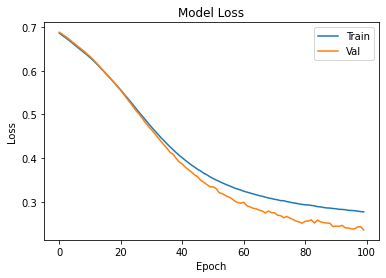

In [18]:
import matplotlib.pyplot as plt

#plot loss and val_loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])

plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

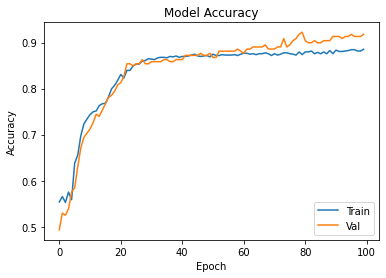

In [21]:
#plot acc and val_acc
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])

plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

### **Adding Regularization**


**Over-fitted Model**

In [27]:
# Example of NN that will badly overfit on training set
model_2 = Sequential([
    Dense(1000, activation='relu', input_shape=(10,)),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1, activation='sigmoid'),
])
model.summary()

model_2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

hist_2 = model_2.fit(x_train, y_train,
          batch_size=32, epochs=100,
          validation_data=(x_val, y_val))

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 32)                352       
_________________________________________________________________
dense_4 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
Total params: 1,441
Trainable params: 1,441
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
32/32 [==============================] - 2s 43ms/step - loss: 0.5795 - accuracy: 0.7180 - val_loss: 0.3309 - val_accuracy: 0.8721
Epoch 2/100
32/32 [==============================] - 1s 37ms/step - loss: 0.3476 - accuracy: 0.8540 - val_loss: 0.3002 - val_accuracy: 0.8995
Epoch 3/100
32/32 [==============================] - 1s 36ms/step - loss: 0.3422 - accuracy: 0.860

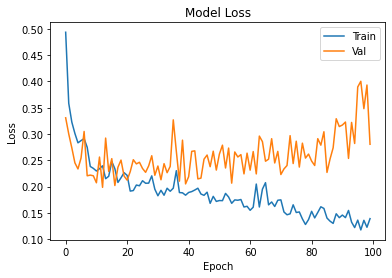

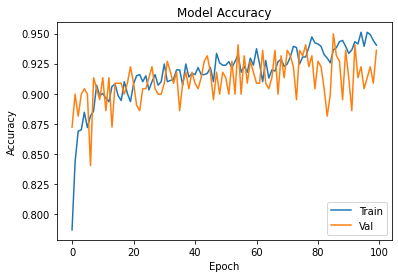

In [28]:
#Over-fitting: trainiing loss is decreasing, but 
#validation loss is increasing and significantly above the trianing loss
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

#Divergence between training and validation accuracy
plt.plot(hist_2.history['accuracy'])
plt.plot(hist_2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()


### **Strategies to Deal w/ Overfitting**
*   L2 Regularization
*   Dropout

**Model w/ Dropout and L2 Regularization**

In [29]:
from keras.layers import Dropout
from keras import regularizers

#add L2 regularization: include the squared values of parameters in our overall loss function
#add dropout layers: the neurons in the previous layer has a probability of 0.3 in dropping out during training
model_3 = Sequential([
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(10,)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
])

model.summary()

model_3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

hist_3 = model_3.fit(x_train, y_train,
          batch_size=32, epochs=100,
          validation_data=(x_val, y_val))

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 32)                352       
_________________________________________________________________
dense_4 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
Total params: 1,441
Trainable params: 1,441
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
32/32 [==============================] - 3s 55ms/step - loss: 21.1138 - accuracy: 0.5612 - val_loss: 3.8827 - val_accuracy: 0.7534
Epoch 2/100
32/32 [==============================] - 2s 48ms/step - loss: 2.4940 - accuracy: 0.8299 - val_loss: 0.6337 - val_accuracy: 0.8904
Epoch 3/100
32/32 [==============================] - 2s 48ms/step - loss: 0.6212 - accuracy: 0.83

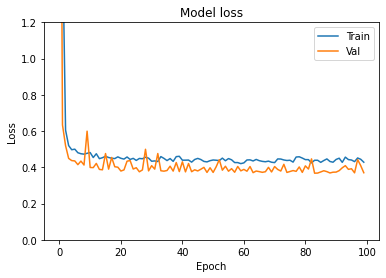

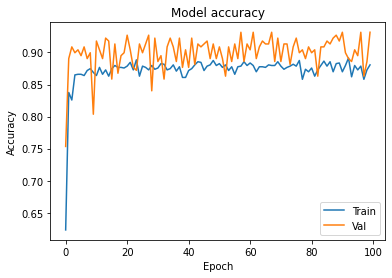

In [31]:
#the loss is a lot higher at the start
plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()

#validation loss closely matches our training loss
plt.plot(hist_3.history['accuracy'])
plt.plot(hist_3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

# Sucessfully applied regularization techniques to reduce overfitting to the training set

**Mean Squared Error Loss Over the Training Epochs for Training and Testing Sets**

In [38]:
model_4 = Sequential([
    Dense(32, activation='relu', input_shape=(10,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])

model_4.compile(optimizer='sgd',
              loss='mean_squared_error',
              metrics=['accuracy'])

hist_4 = model_4.fit(x_train, y_train,
          batch_size=32, epochs=100,
          validation_data=(x_val, y_val))

Epoch 1/100
32/32 [==============================] - 1s 8ms/step - loss: 0.2489 - accuracy: 0.5288 - val_loss: 0.2473 - val_accuracy: 0.5068
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 0.2468 - accuracy: 0.5063 - val_loss: 0.2456 - val_accuracy: 0.4886
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 0.2460 - accuracy: 0.4912 - val_loss: 0.2440 - val_accuracy: 0.4886
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 0.2426 - accuracy: 0.5196 - val_loss: 0.2424 - val_accuracy: 0.4886
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.2395 - accuracy: 0.5367 - val_loss: 0.2409 - val_accuracy: 0.4886
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2384 - accuracy: 0.5218 - val_loss: 0.2394 - val_accuracy: 0.4932
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.2380 - accuracy: 0.5066 - val_loss: 0.2380 - val_accuracy: 0.4932
Epoch 8/100
3

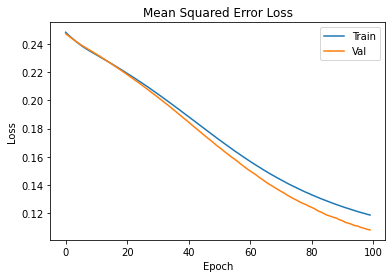

In [40]:
plt.plot(hist_4.history['loss'])
plt.plot(hist_4.history['val_loss'])
plt.title('Mean Squared Error Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()